<a href="https://colab.research.google.com/github/phuongnt3391/ReinforcementLearning/blob/main/ThompsonSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thompson Sampling

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the dataset

In [ ]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [ ]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Implementing Thompson Sampling

In [21]:
import random
N = 10000
d = 10
ads_selected = []
no_of_rewards_1 = [0] * d
no_of_rewards_0 = [0] * d
total_rewards = 0
for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(no_of_rewards_1[i]+1,no_of_rewards_0[i]+1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i   
  ads_selected.append(ad)
  reward = df.values[n,ad]
  if reward == 1:
    no_of_rewards_1[ad] = no_of_rewards_1[ad] +1
  else:
    no_of_rewards_0[ad] = no_of_rewards_0[ad] +1
  total_rewards = total_rewards + reward



Visualizing the results


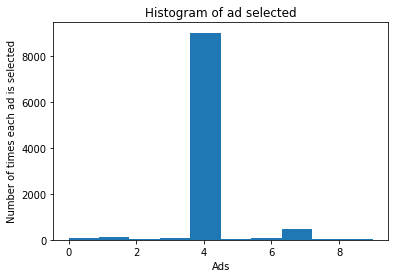

In [22]:

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad is selected')
plt.show()
